a       =  -0.4328±0.1938
b       =  0.0190±0.0008
R²      =  0.9864
χ²      =  138.4963
red. χ² =  34.6241


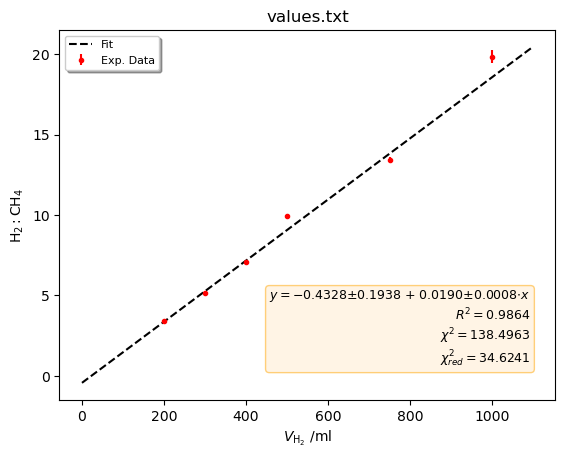

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# regression.py
#

##########################################################################################
import sys                                                      #sys
from uncertainties import ufloat
import matplotlib.pyplot as plt                                 #plots
import numpy as np                                              #summation and other math

from scipy.optimize import curve_fit                                         
##########################################################################################

def imp_data(filename):
    exp_data = []
    with open(filename, 'r') as file:
        for line in file:
            if not line.startswith("#"):
                parts = line.split()
                x = parts[0]
                x = float(x)
                if '±' in parts[1]:
                    y, sigma_y = parts[1].split('±')
                    y = float(y)
                    sigma_y = float(sigma_y)
                else:
                    y = parts[1]
                    y = float(y)
                    sigma_y = 0
                exp_data.append((x, y, sigma_y))
    return np.array(exp_data), filename

def linear_model(x, a, b):
    return a + b * x
    
def do_the_fit(exp_data):
    x = exp_data[:,0]
    y = exp_data[:,1]
    sigma_y = exp_data[:,2]
    popt, pcov = curve_fit(linear_model, x, y, sigma  = sigma_y)
    a, b = popt
    perr = np.sqrt(np.diag(pcov))
    a_err = perr[0]
    b_err = perr[1]
    
    residuals = y - linear_model(x, *popt)
    s_res = np.sum(residuals**2)
    s_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (s_res / s_tot)
    
    chi_sqr = np.sum(((y - linear_model(x, a, b)) / sigma_y) ** 2)
    dof = len(x) - len(popt)
    red_chisqr = chi_sqr / dof
    return a, b, a_err, b_err, r_squared, chi_sqr, red_chisqr

def plot_results(exp_data, fit_values, filename):
    x = exp_data[:,0]
    y = exp_data[:,1]
    sigma_y = exp_data[:,2]
    a = fit_values[0]
    b = fit_values[1]
    a_err = fit_values[2]
    b_err = fit_values[3]
    r_squared = fit_values[4]
    chi_sqr = fit_values[5]
    red_chisqr = fit_values[6]
    
    p_x = np.arange(0,max(x)*0.1+max(x))
    
    fig, ax = plt.subplots()
    plt.errorbar(x, y, yerr = sigma_y, fmt='r.', label='Exp. Data')
    plt.plot(p_x, linear_model(p_x, a, b), '--', color = 'black', label='Fit')
    plt.legend(fancybox = True, shadow = True, loc='upper left', prop={'size': 8})
    plt.xlabel(r'$V_\mathrm{H_2}$ /ml')
    plt.ylabel(r'$\mathrm{H_2} : \mathrm{CH_4}$')
    plt.title(filename)
    # add text box for the statistics
    stats = ('$y = $' + u'${:.4fP}$'.format(ufloat(a, a_err)) 
            + ' + ' u'${:.4fP}$'.format(ufloat(b, b_err)) + '$\cdot x$\n'
            + '$R^2 = $' + u'${:.4f}$'.format(r_squared) + '\n'
            + '$\chi^2 = $' + u'${:.4f}$'.format(chi_sqr) + '\n'
            + '$\chi^2_{red} = $' + u'${:.4f}$'.format(red_chisqr))
             
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    plt.text(0.95, 0.1, stats, fontsize=9, bbox=bbox,transform = ax.transAxes,
            horizontalalignment='right')
    plt.show()

def print_results(fit_values):
    a = fit_values[0]
    b = fit_values[1]
    a_err = fit_values[2]
    b_err = fit_values[3]
    r_squared = fit_values[4]
    chi_sqr = fit_values[5]
    red_chisqr = fit_values[6]
    print('a       = ', u'{:.4fP}'.format(ufloat(a, a_err)))
    print('b       = ', u'{:.4fP}'.format(ufloat(b, b_err)))
    print('R²      = ', '{:.4f}'.format(r_squared))
    print('χ²      = ', '{:.4f}'.format(chi_sqr))
    print('red. χ² = ', '{:.4f}'.format(red_chisqr))

exp_data, filename = imp_data("values.txt")
fit_values = do_the_fit(exp_data)
print_results(fit_values)
plot_results(exp_data, fit_values, filename)